# Part-of-Speech tags correlations

Correlations of part-of-speech tags of words with word2bits vectors.

- PoS are all possible tags occurring with given word, as retrieved by Majka.
- Word vectors are binary vectors embedded independently.

We hope to see some attributes of word vectors to significantly correlate with some of the 36 tags' vectors. Therefore, we create a matrix of all correlations between PoS tags <> word vectors.

In [1]:
import pandas as pd
from nltk.corpus import wordnet as wn

vec_length = 30
epochs = 10

vecs_df = pd.read_csv("../vectors/1b%sd_vectors_e%s_nonbin" % (vec_length, epochs), 
                      skiprows=[0], header=None, sep=" ")
vecs_df = vecs_df.set_index(0)
vecs_df = vecs_df.drop(columns=[vecs_df.columns[-1]])
vecs_df = vecs_df.replace(vecs_df.values.max(), 1)
vecs_df = vecs_df.replace(vecs_df.values.min(), 0)
# retype to minimal range int to save space
vecs_df = vecs_df.astype('int8')
vecs_df.head(20)

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,,,,,,,,,,,,,,,,,,,,,
</s>,1,1,1,0,1,1,1,1,0,1,...,1,1,0,1,1,1,1,1,0,1
the,1,0,1,1,1,0,0,1,1,0,...,1,1,1,0,0,1,1,0,0,1
of,1,0,1,1,1,0,0,1,1,0,...,1,1,1,0,0,1,1,0,0,1
and,1,0,1,1,1,0,0,1,1,0,...,1,1,1,0,0,1,1,0,0,1
one,1,0,1,1,1,0,0,1,1,0,...,1,1,1,0,0,1,0,0,0,1
in,1,0,1,1,1,0,0,1,1,0,...,1,1,1,0,0,1,1,0,0,1
a,1,0,1,1,1,0,0,1,1,0,...,1,1,1,0,0,1,1,0,0,1
to,1,0,1,1,1,0,0,1,1,0,...,1,1,1,0,0,1,1,0,0,1
zero,1,0,1,1,1,0,0,1,1,0,...,1,1,1,0,0,1,0,0,0,1


In [2]:
import majka

morph = majka.Majka("../data/w-lt.en.fsa")
morph.flags |= majka.IGNORE_CASE  # ignore the word case whatsoever
morph.tags = True  # turn tag processing back on (default)

morph.find('go')

[{'lemma': 'go', 'tags': {'other': 'NN'}},
 {'lemma': 'go', 'tags': {'other': 'VB'}},
 {'lemma': 'go', 'tags': {'other': 'VBP'}}]

In [3]:
def tags_for_word(word):
     return set([lemma["tags"]["other"] for lemma in morph.find(str(word))])

In [4]:
tags_for_word("go")

{'NN', 'VB', 'VBP'}

In [5]:
word_tags = dict()
for word in vecs_df.index.values:
    word_tags[word] = tags_for_word(word)
    
all_tags = set.union(*word_tags.values())
all_tags

{'CC',
 'DT',
 'EX',
 'IN',
 'JJ',
 'JJR',
 'JJS',
 'MD',
 'MD+RB',
 'NN',
 'NNS',
 'PDT',
 'PRP',
 'PRP$',
 'RB',
 'RBR',
 'RBS',
 'RP',
 'TO',
 'VB',
 'VBD',
 'VBG',
 'VBN',
 'VBP',
 'VBZ',
 'WDT',
 'WP',
 'WP$',
 'WRB'}

In [6]:
for tag in all_tags:
    vecs_df[tag] = [1 if tag in tags_for_word(word) else 0 for word in vecs_df.index]

In [7]:
vecs_df.head()

,1,2,3,4,5,6,7,8,9,10,...,RP,EX,TO,WRB,RB,VB,RBR,VBN,JJ,VBZ
0,,,,,,,,,,,,,,,,,,,,,
</s>,1,1,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
the,1,0,1,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
of,1,0,1,1,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
and,1,0,1,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
one,1,0,1,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


corr_df = vecs_df.corr()[list(all_tags)].loc[range(vec_length)]
corr_df = corr_df.sort_index(axis=1)
plt.figure(figsize = (20, 20))
sns.heatmap(corr_df, annot=True)

/home/michal/miniconda3/envs/p36/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


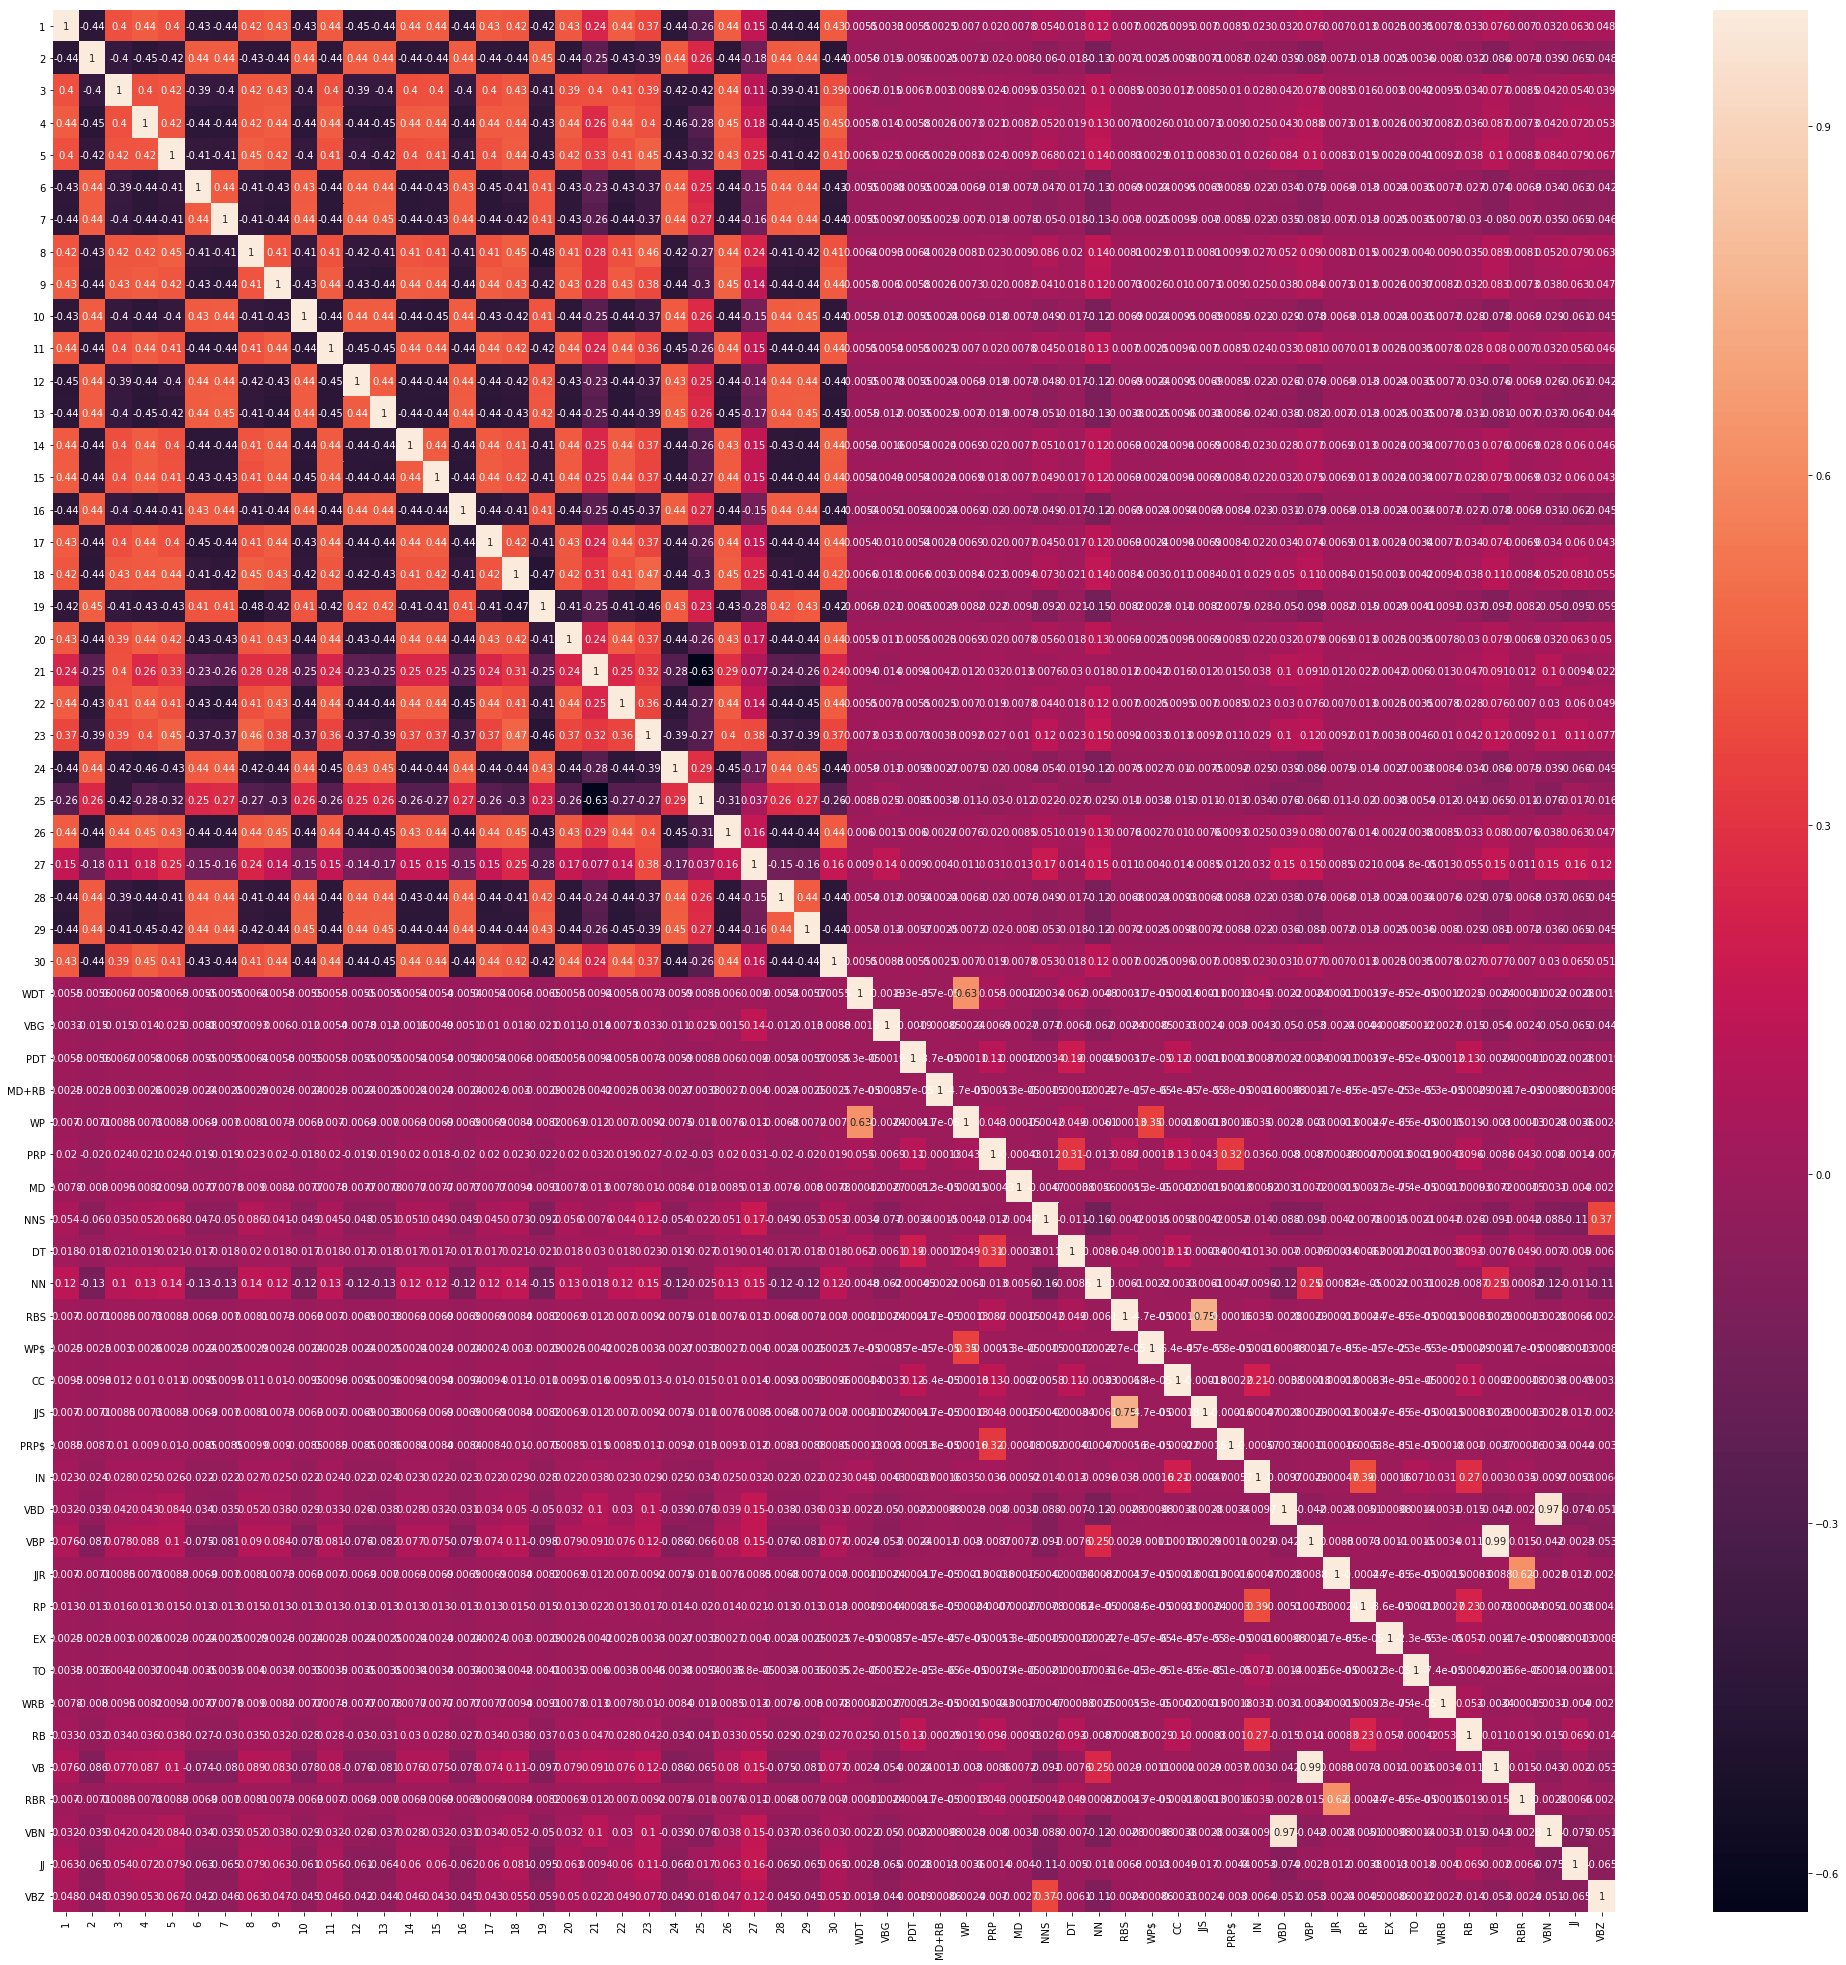

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


corr_df = vecs_df.corr()

plt.figure(figsize = (35, 35))
sns.heatmap(corr_df, annot=True)

### Iteration over correlations

Inspect a level of top correlation depending on a size of word2bit vector. 

In [10]:
def top_corr_for_vecfile(vecfile_path):
    vecs_df = pd.read_csv(vecfile_path, skiprows=[0], header=None, sep=" ")
    vecs_df = vecs_df.set_index(0)
    vecs_df = vecs_df.drop(columns=[vecs_df.columns[-1]])
    vecs_df = vecs_df.replace(vecs_df.values.max(), 1)
    vecs_df = vecs_df.replace(vecs_df.values.min(), 0)

    vecs_df = vecs_df.astype('int8')
    
    for tag in all_tags:
        vecs_df[tag] = [1 if tag in tags_for_word(word) else 0 for word in vecs_df.index]
    
    corr_df = vecs_df.corr()[list(all_tags)].loc[range(vec_length)]
    return corr_df.max()

In [13]:
epochs = 10

vec_range = list(range(10, 110, 10))
print(vec_range)
vec_files = ["../vectors/1b%sd_vectors_e%s_nonbin" % (vec_len, epochs) for vec_len in vec_range]
corr_for_dims_df = pd.DataFrame()
for vec_dim_i in range(len(vec_range)):
    corr_for_dims_df["%s dims" % vec_range[vec_dim_i]] = top_corr_for_vecfile(vec_files[vec_dim_i])

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


/home/michal/miniconda3/envs/p36/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  del sys.path[0]


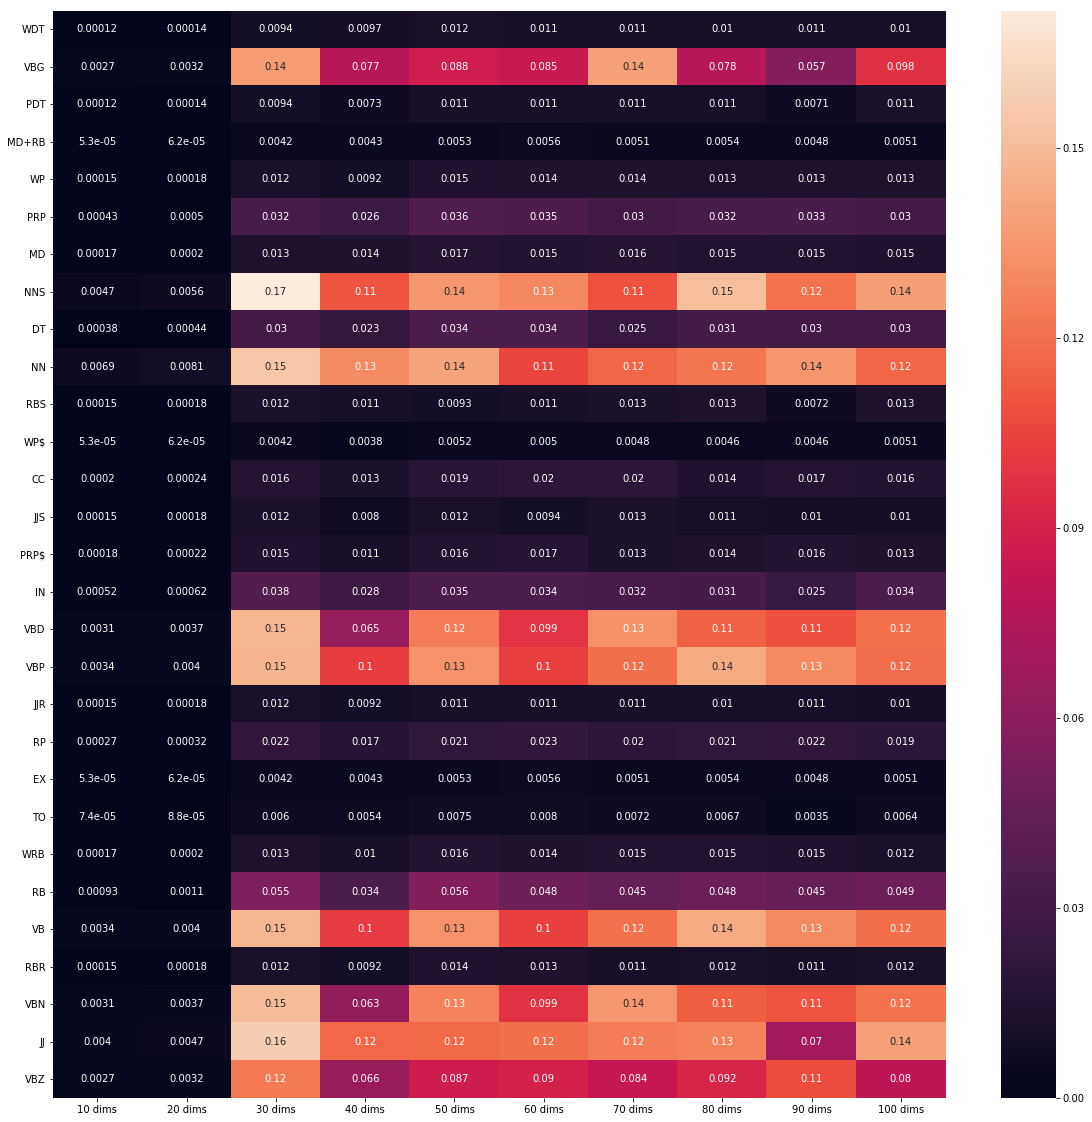

In [14]:
plt.figure(figsize = (20, 20))
sns.heatmap(corr_for_dims_df, annot=True)

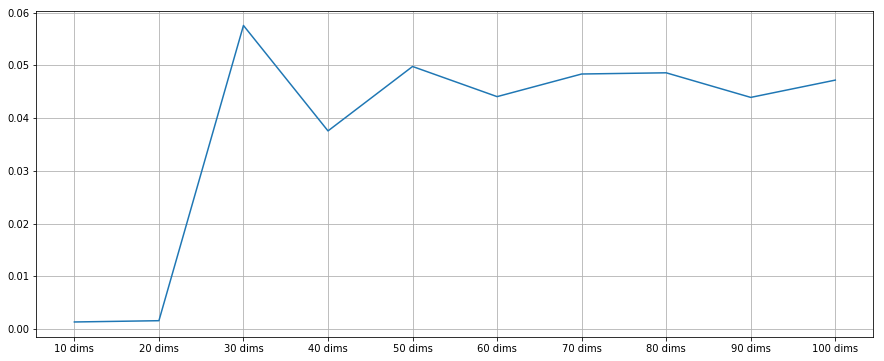

In [15]:
ax = plt.figure(figsize = (15, 6))
plt.xticks = corr_for_dims_df.index
corr_for_dims_df.mean().plot(grid=True, xticks=range(len(corr_for_dims_df.mean().index)))

In [ ]:
epochs = 10

vec_range = list(range(10, 110, 10)) + list(range(150, 1500, 100))
vec_files = ["../vectors/1b%sd_vectors_e%s_nonbin" % (vec_len, epochs) for vec_len in vec_range]
corr_for_dims_df = pd.DataFrame()
for vec_dim_i in range(len(vec_range)):
        corr_for_dims_df[vec_range[vec_dim_i]] = top_corr_for_vecfile(vec_files[vec_dim_i])
    
corr_for_dims_df.sort_index(inplace=True, axis=1)

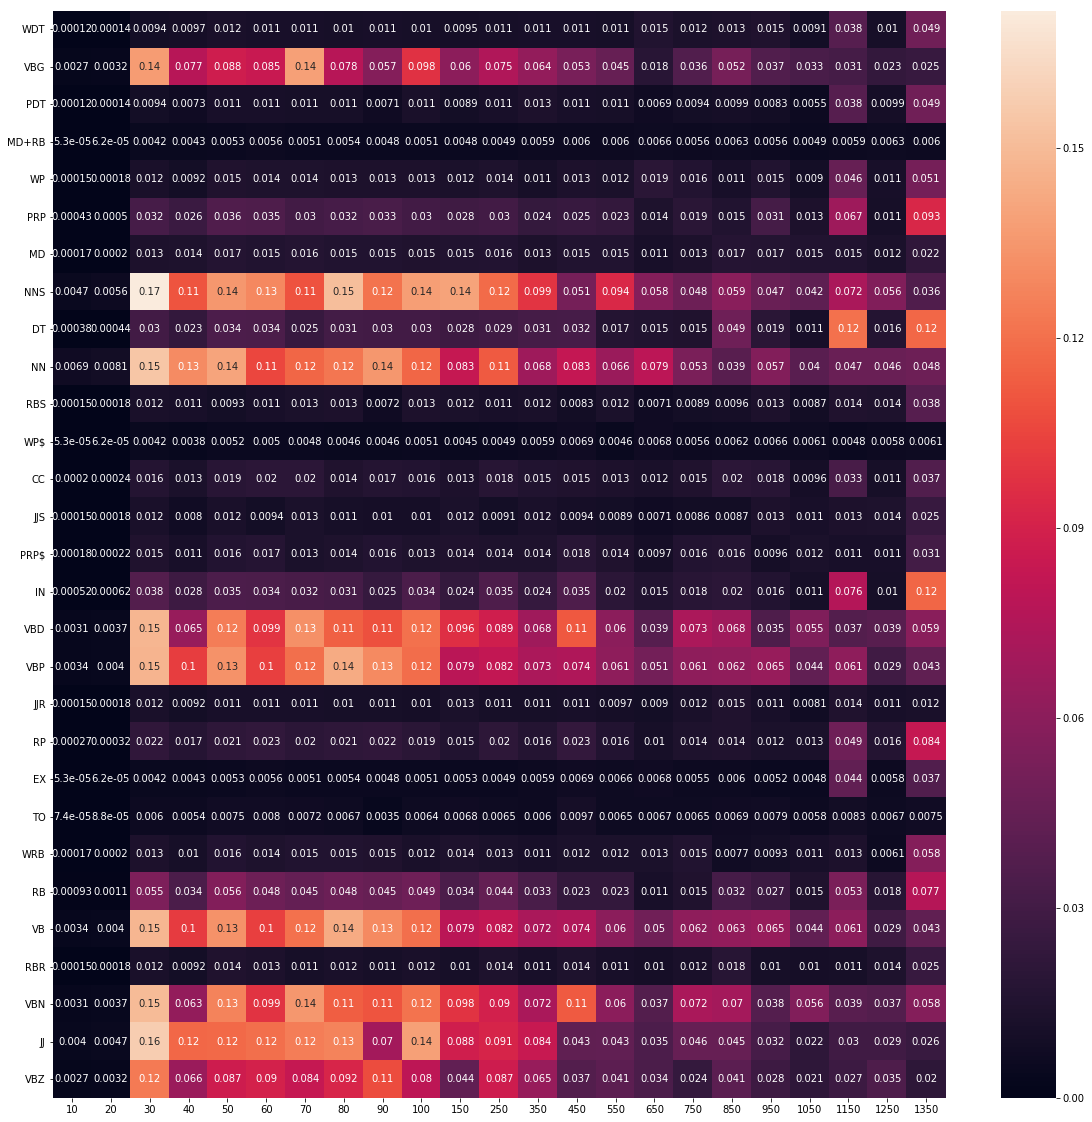

In [17]:
plt.figure(figsize = (20, 20))
sns.heatmap(corr_for_dims_df, annot=True)

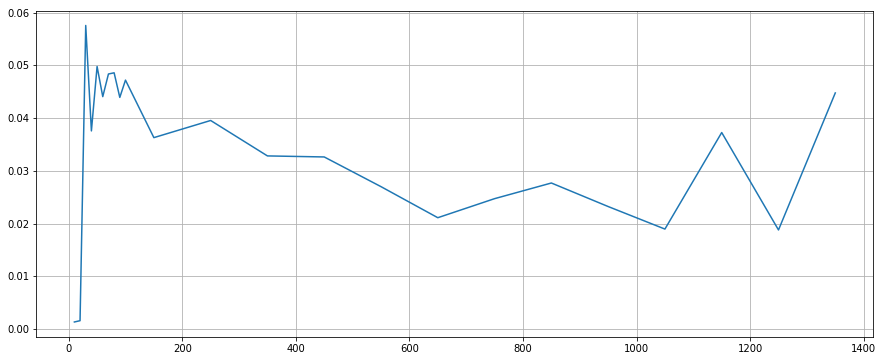

In [19]:
ax = plt.figure(figsize = (15, 6))
plt.xticks = corr_for_dims_df.index
corr_for_dims_df.mean().plot(grid=True)